<a href="https://colab.research.google.com/github/cumloverr/imageClasification/blob/main/iridDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
iris = datasets.load_iris()

In [5]:
df = pd.DataFrame({
    'x' : iris.data[:,0],
    'y' : iris.data[:,1],
    'cluster' : iris.target
})


In [7]:
df

,x,y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [8]:
centroids = {}
for i in range(3):
  result_list =[]
  result_list.append(df.loc[df['cluster'] == i] ['x'].mean())
  result_list.append(df.loc[df['cluster'] == i] ['y'].mean())

  centroids[i] = result_list

Text(0, 0.5, 'Sepan Width')

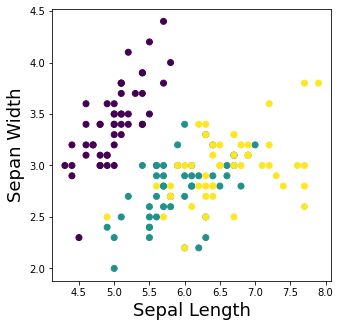

In [9]:
fig = plt.figure(figsize = (5, 5))
plt.scatter(df['x'], df['y'], c=iris.target)
plt.xlabel('Sepal Length',fontsize = 18)
plt.ylabel('Sepan Width', fontsize = 18)

KeyError: ignored

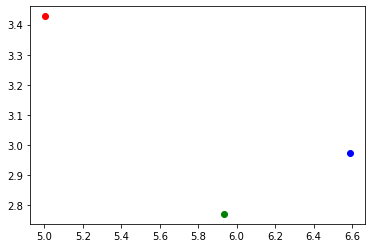

In [13]:
colmap = {0: 'r', 1: 'g', 2: 'b'}
for i in range(30):
  plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i])
plt.show()

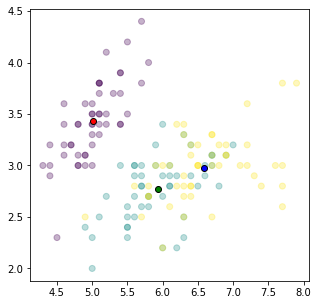

In [14]:
fig = plt.figure(figsize =(5,5))
plt.scatter(df['x'], df['y'], c = iris.target, alpha = 0.3)
colmap = {0: 'r', 1: 'g', 2: 'b'}
col = [0,1]
for i in centroids.keys():
  plt.scatter(centroids[i][0],centroids[i][1], c = colmap[i], edgecolors='k')
plt.show()

In [17]:
def assigment(df,centroids):
  for i in range(3):
    #aqrt ({x1-x2}^2 + {y1-y2}^2)
    df['distance_from_{}'.format(i)] = (
        np.sqrt(
            (df['x'] - centroids[i][0]) ** 2
            + (df['y'] - centroids[i][1]) ** 2
  
        )
    )
  centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
  df['closset'] = df.loc[:, centroid_distance_cols].idxmin(axis = 1)
  df['closset'] = df['closset'].map(lambda x: int(x.lstrip('distance_from_')))
  df['color'] = df['closset'].map(lambda x: colmap[x])
  return df


In [19]:
df = assigment(df,centroids)

In [20]:
df

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closset,color
0,5.1,3.5,0,0.118406,1.109863,1.578233,0,r
1,4.9,3.0,0,0.440931,1.061224,1.688200,0,r
2,4.7,3.2,0,0.381602,1.308662,1.901478,0,r
3,4.6,3.1,0,0.521939,1.376153,1.991989,0,r
4,5.0,3.6,0,0.172105,1.250998,1.706933,0,r
...,...,...,...,...,...,...,...,...
145,6.7,3.0,2,1.747232,0.797870,0.114978,2,b
146,6.3,2.5,2,1.592363,0.453206,0.554635,1,g
147,6.5,3.0,2,1.554098,0.609094,0.091761,2,b
148,6.2,3.4,2,1.194328,0.683078,0.576212,2,b


NameError: ignored

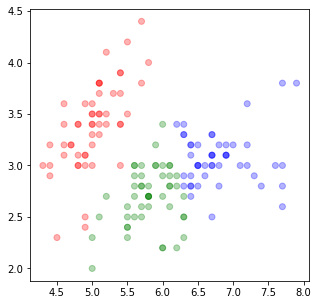

In [21]:
fig = plt.figure(figsize = (5, 5))
plt.scatter(df['x'], df['y'], color = df['color'], alpha = 0.3)
for i in centroid.keys():
  plt.scatter(*centroids[i], color = colmap[i], edgecolor = 'k')

plt.show()

In [22]:
def update(k):
  for i in range(3):
    centroids[i][0] = np.mean(df[df['closset'] == i]['x'])
    centroids[i][1] == np.mean(df[df['closset'] == i] ['y'])
  return k

In [23]:
centroids = update(centroids)
centroids

{0: [5.006, 3.428],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.974]}

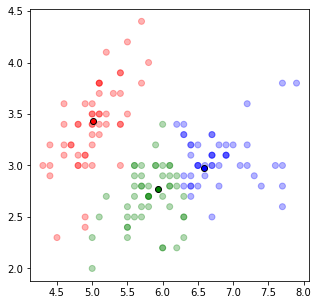

In [24]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'],  color = df['color'], alpha = 0.3)
for i in centroids.keys():
  plt.scatter(*centroids[i], color = colmap[i], edgecolor = 'k')
plt.show()

In [26]:
while True:
  closset_centroids = df['closset'].copy(deep = True)
  centorids = update(centroids)
  df = assigment(df, centroids)
  if closset_centroids.equals(df['closset']):
    break

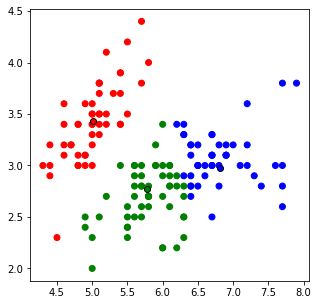

In [27]:
fig = plt.figure(figsize = (5,5))
plt.scatter(df['x'], df['y'], color = df['color'])
for i in centroids.keys():
  plt.scatter(centroids[i][0],centroids[i][1], color = colmap[i], edgecolor = 'k')
plt.show()